## End to End Project: Classify Coloured Images of Cats and Dogs
 - Build a Model to classify 1000's of images into Cats and Dogs
 - Kaggle Dataset..
 
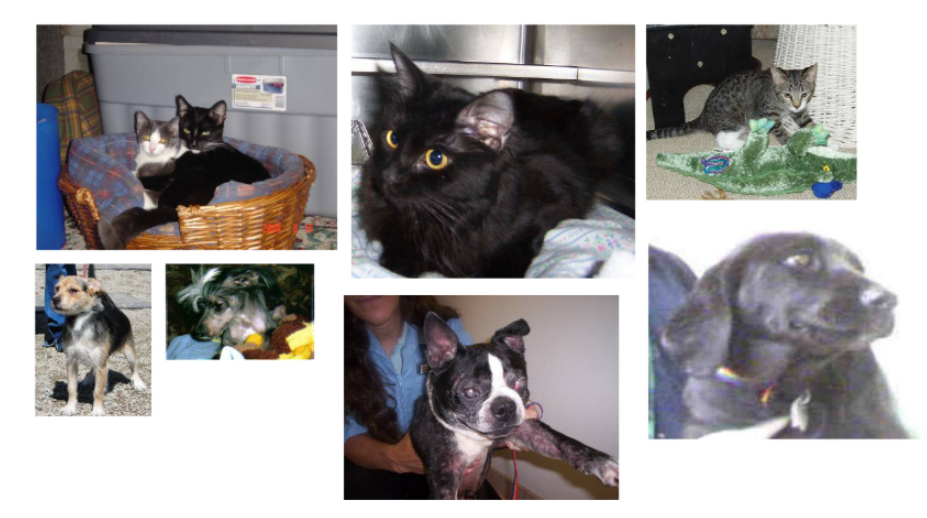

 - Dataset containing 4000 pictures of cats and dogs (2000 cats, 2000 dogs). We will use 2000 pictures for training, 1000 for validation, and finally 1000 for testing
 
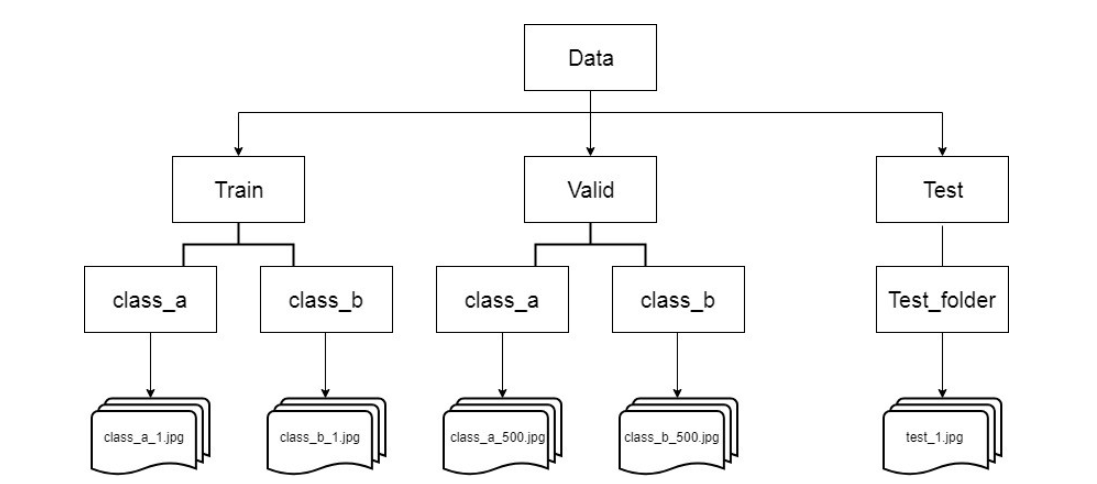

 - Deatails of project:
     - Binary Classification Problem. Either image is of Cat or of a Dog. Hence 2 classes.
     - Colored Images. Hence 3 channels --> RGB
     - No standard dimension of all the images
     - Dataset of 4000 images:
         - Train: 2000 images
         - Validation: 1000 images
         - Test: 1000 images
         
 - Process of the project:
     - CNN Model with 4 convolutional layers, paid with pooling layers
     - Introducing data augmentation, a process of creating artifical images using the original dataset. Using various transformation techniques: Linear, Rotations, Shear, Zooming In and Out etc...
     - Use pre-learned architectures to classify images, Transfer Learning

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
train_dir = r'C:\Users\HP\Downloads\internshala - deep learning\image recognition\train'
validation_dir = r'C:\Users\HP\Downloads\internshala - deep learning\image recognition\validation'
test_dir = r'C:\Users\HP\Downloads\internshala - deep learning\image recognition\test'

### Data Preprocessing

* Read the picture files.
* Decode the JPEG content to RBG grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ImageDataGenerator has ability to perform - jpeg content to rgb grid of pixels ; conerting to floating point tensors ; 
# rescale pixel values of 0 to 255 to 0 and 1 interval

Link for Keras Image Preprocessing: https://keras.io/preprocessing/image/

In [13]:
# 2 parts of ImageDataGenerator:
# to get image
# rescale the image

# in this case want images to be fed directly from the directory/folder hence will be using --> flow_from_directory method

train_datagen = ImageDataGenerator(rescale=1./255) #RGB values getting divided by 255
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),  # size of the images as per requirement hence standardizing the images
        batch_size=20, # flow_from_directory will feed images in form of 20 batches to train_generator
        class_mode='binary') # providing information of content inside the folders -  2 folders hence binary

# output of train_generator will be in form of X & Y varriables
# Y varriables depend upon the name of the folders

# 20 images at a time to be fed inside fir function() while training model
# Advantage of using ImageDataGenerator --> incase want augmented data can apply many more functions like 
# rescale, zoom, shear etc to generate more data from exsisiting data

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Structure of CNN Model
 -  4 different conv layers with max pooling and the dense layer and output neuron.

In [14]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [15]:
model = models.Sequential()

# CNN

# first conv layer with fiter 32 and a window of 3x3 and input size=150x150x3, RGB vimages hence 3rd dimension as 3
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
# max pooling layer of window 2x2
model.add(layers.MaxPooling2D((2, 2)))

# second conv layer with fiter 64 and a window of 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# max pooling layer of window 2x2
model.add(layers.MaxPooling2D((2, 2)))

# third conv layer with fiter 128 and a window of 3x3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# max pooling layer of window 2x2
model.add(layers.MaxPooling2D((2, 2)))

# fourth conv layer with fiter 128 and a window of 3x3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# max pooling layer of window 2x2
model.add(layers.MaxPooling2D((2, 2)))

# ANN

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu')) # single dense layer of 512 neurons

model.add(layers.Dense(1, activation='sigmoid')) # single output layer with 1 neuron as want to predict either of the class

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [17]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), # RMS prop has advamtage over sgd while performing image processing
              metrics=['acc'])

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [18]:
history = model.fit(
      train_generator, # generating data continuously
      steps_per_epoch=100, # stopping point --> train dataset of 2000 images and batch_size of 20  hence steps_per_epoch=100
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50) # validation dataset of 1000 images and batch_size of 20  hence validation_steps=50

Epoch 1/20
100/100 [==============================] - 96s 938ms/step - loss: 0.6902 - acc: 0.5210 - val_loss: 0.6712 - val_acc: 0.5420
Epoch 2/20
100/100 [==============================] - 66s 655ms/step - loss: 0.6544 - acc: 0.6050 - val_loss: 0.6655 - val_acc: 0.5700
Epoch 3/20
100/100 [==============================] - 70s 700ms/step - loss: 0.6022 - acc: 0.6700 - val_loss: 0.6154 - val_acc: 0.6440
Epoch 4/20
100/100 [==============================] - 70s 702ms/step - loss: 0.5613 - acc: 0.7155 - val_loss: 0.6146 - val_acc: 0.6540
Epoch 5/20
100/100 [==============================] - 71s 708ms/step - loss: 0.5328 - acc: 0.7340 - val_loss: 0.6531 - val_acc: 0.6310
Epoch 6/20
100/100 [==============================] - 71s 708ms/step - loss: 0.5163 - acc: 0.7400 - val_loss: 0.5716 - val_acc: 0.6830
Epoch 7/20
100/100 [==============================] - 71s 709ms/step - loss: 0.4800 - acc: 0.7625 - val_loss: 0.5736 - val_acc: 0.6900
Epoch 8/20
100/100 [==============================] - 7

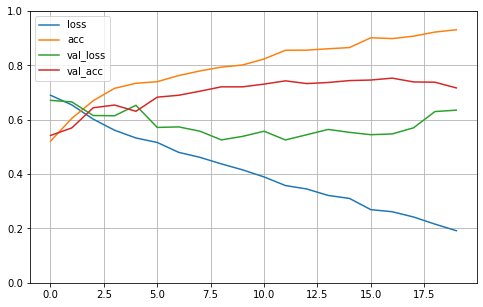

In [19]:
# validation_accuracy is somehwhat close to 73-74%

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [26]:
# there is a large difference between training_acc and validation_acc
# val_acc oscilating around 73-74%
# train_acc oscilating around 92-93% and increasing with each epoch

# this graph shows there is an Overfitting in the model becuase with each epoch train_Acc is increasing but not able to 
# increase the val_acc

# to over overfitting --> will be creating dummy data
# will modify exsisting data into different forms by applying zoom,shear,rotation etc...
# aim know to increase validation accuracy and reduce overfitting

#### Visualization of Image before Image Preprocessing

Found 2000 files belonging to 2 classes.


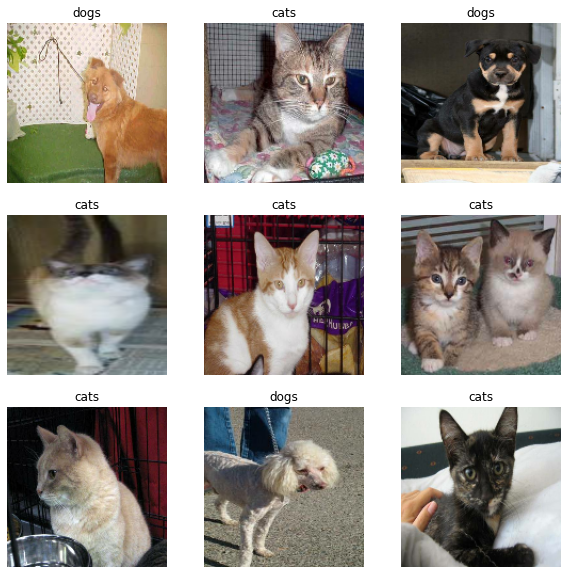

In [25]:
import pathlib

data_dir_train = pathlib.Path('C:/Users/HP/Downloads/internshala - deep learning/image recognition/train/')
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, labels='inferred', batch_size= 20, 
                                                               image_size=(150,150), shuffle=True, seed=123, 
                                                               interpolation='bilinear', 
                                                               follow_links=False)
class_names = train_ds.class_names

plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [21]:
# image preprocessing: shear, rotation, width shift, height shift and zoom to create dummy data from original data

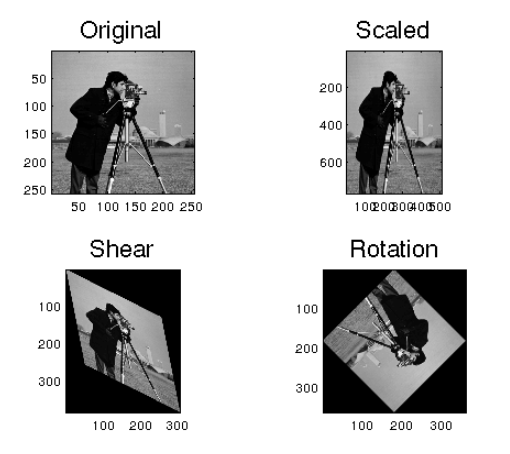

In [80]:
# image preprocessing

# images will flow from directory through flow_from_directory

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, # randomly select any value between -40 to +40 and rotate the original image
    width_shift_range=0.2, # randomly select any number between 0 to 0.2 i.e 20% width shift on original image from left or right
    height_shift_range=0.2, # randomly select any number between 0 to 0.2 i.e 20% height shift on original image from up or down
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,) # mirror image of original image

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # reading data from train directory
        target_size=(150, 150), # standardizing the image scale
        batch_size=32, # images to be transfered to tensor in batch size of 32
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


TypeError: Invalid shape (32, 150, 150, 3) for image data

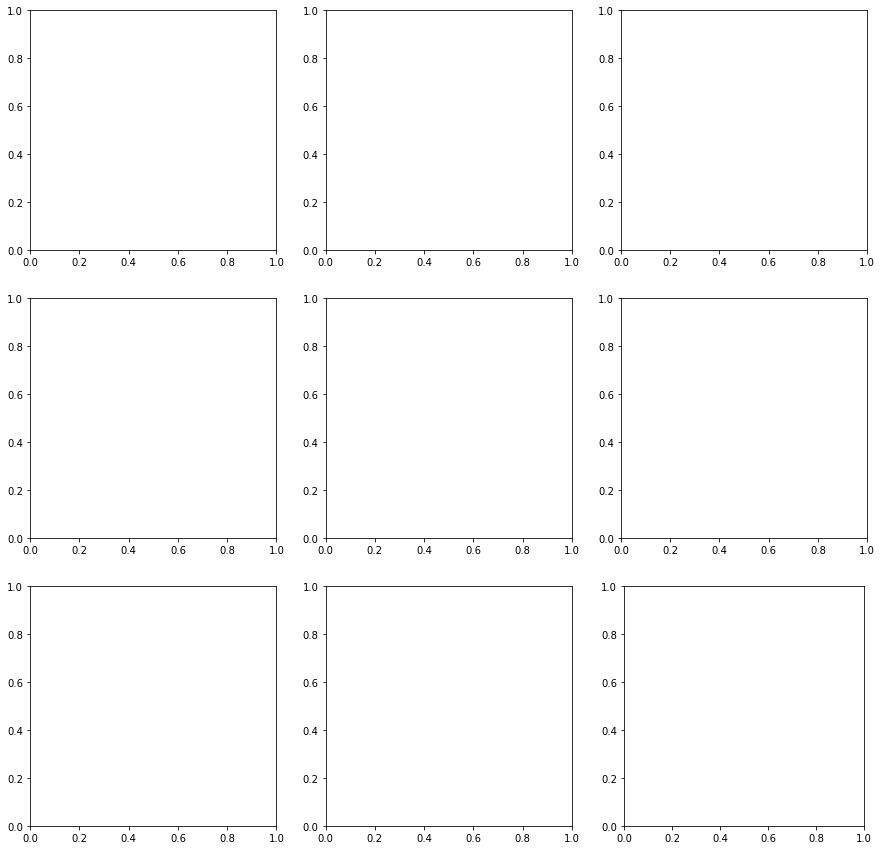

In [87]:
fig =  plt.subplots(nrows=3, ncols=3, figsize=(15,15))

for i in range(9):
    image = next(train_generator)[0].astype('uint8')
    image = np.squeeze(image) 
    plt.imshow(image)

In [101]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # deactivate randomly 50% neurons durig each epoch also to avoid overfitting the model
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [102]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [103]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 69s 684ms/step - loss: 0.6919 - acc: 0.5165 - val_loss: 0.6870 - val_acc: 0.5420


In [104]:
## steps_per_epoch = train length // batch size
2000//32

62

In [110]:
history = model.fit(
      train_generator,
      steps_per_epoch=62,
      epochs=5,
      validation_data=validation_generator)

Epoch 1/5
62/62 [==============================] - 71s 1s/step - loss: 0.5351 - acc: 0.7353 - val_loss: 0.5463 - val_acc: 0.7270
Epoch 2/5
62/62 [==============================] - 76s 1s/step - loss: 0.5544 - acc: 0.7165 - val_loss: 0.5321 - val_acc: 0.7310
Epoch 3/5
62/62 [==============================] - 76s 1s/step - loss: 0.5359 - acc: 0.7231 - val_loss: 0.5262 - val_acc: 0.7250
Epoch 4/5
62/62 [==============================] - 75s 1s/step - loss: 0.5426 - acc: 0.7266 - val_loss: 0.5067 - val_acc: 0.7440
Epoch 5/5
62/62 [==============================] - 82s 1s/step - loss: 0.5359 - acc: 0.7246 - val_loss: 0.5167 - val_acc: 0.7450


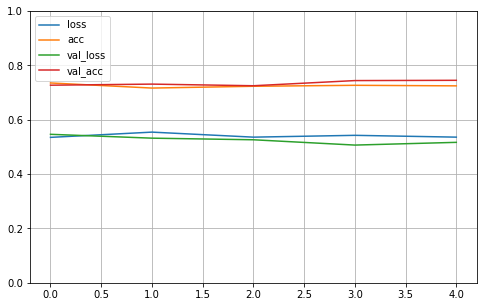

In [111]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [112]:
# val_acc is more then 72% and same for train_acc and both are moving together hence no overfitting

In [113]:
model.save("cat_dog_model_after_modification.h5")

In [115]:
del model

NameError: name 'model' is not defined

In [116]:
keras.backend.clear_session()

## Transfer Learning Concept

### VGG16Net

In [5]:
# aim to increase validation acc
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# create architecture of model
# will be taking convolutional base for extracting useful insights of image feature from pre-trained cgg16net cnn model

from tensorflow.keras.applications import VGG16

# in any convolutional neural netwrok first will provide randomise weight and then convolutional network to optimize weights
# VGG16 already a pre-trained cnn model and can use the final weights of VGG16NET
# imagenet is the ILSVRC compition

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 3s 0us/step


In [7]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [8]:
# fully connected neural netwrok
# ANN

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [11]:
# as can bee seen from below line
# vgg16 (Functional)           (None, 4, 4, 512)         14714688  
# we have to freeze the vgg16 trained paramters as they are lot in number
conv_base.trainable=False

In [12]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), # 2e-5 if using pre-trained weights also of vgg16 to fine tune them as per our new dataset
              metrics=['acc'])

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [13]:
# checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model_Cat_v/s_Dog.h5", save_best_only=True)

In [14]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10, #30
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=[checkpoint_cb])

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 395s 4s/step - loss: 0.5346 - acc: 0.7320 - val_loss: 0.3787 - val_acc: 0.8220
Epoch 2/10
100/100 [==============================] - 394s 4s/step - loss: 0.4077 - acc: 0.8105 - val_loss: 0.2823 - val_acc: 0.8770
Epoch 3/10
100/100 [==============================] - 1265s 13s/step - loss: 0.3932 - acc: 0.8155 - val_loss: 0.2612 - val_acc: 0.8960
Epoch 4/10
100/100 [==============================] - 399s 4s/step - loss: 0.3635 - acc: 0.8385 - val_loss: 0.3512 - val_acc: 0.8370
Epoch 5/10
100/100 [==============================] - 401s 4s/step - loss: 0.3459 - acc: 0.8445 - val_loss: 0.3022 - val_acc: 0.8770
Epoch 6/10
100/100 [==============================] - 401s 4s/step - loss: 0.3438 - acc: 0.8570 - val_loss: 0.2491 - val_acc: 0.8960
Epoch 7/10
100/100 [==============================] - 399s 4s/step - loss: 0.3247 - acc: 0.8555 - val_loss: 0.3880 - val_acc: 0.8360
Epoch 8/10
100/100 [==============================] - 399s 4s/step 

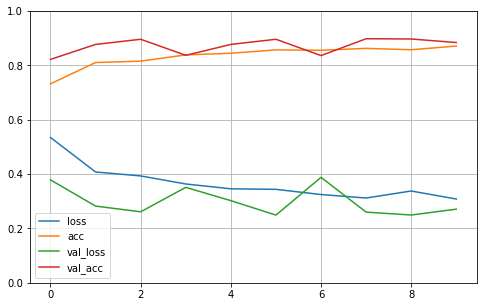

In [15]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [16]:
# 100/100 [==============================] - 397s 4s/step - loss: 0.3082 - acc: 0.8710 - val_loss: 0.2709 - val_acc: 0.8840

In [17]:
hist_df = pd.DataFrame(history.history) 

In [18]:
hist_csv_file = 'history_cat_dog.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

### Use Test Set to evaluate model

In [19]:
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [20]:
model.evaluate_generator(test_generator, steps=50) # steps = testset/batch_size

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.2793441116809845, 0.8880000114440918]

In [21]:
# loss = 0.2793441116809845
# acc_test = 0.8880000114440918

 - Simple Conv Model: val_acc: 0.7170
 - After Data Augmentation: val_acc: 0.7450
 - Pre-trained VGG16Net Model: val_acc: 0.8880
 
##### if epochs would be used more times then there will be large change in accuracy

## Task is to apply InceptionResNetV2 for this classification problem. Compare the execution time and accuracy on the test set.

In [22]:
del model

In [23]:
keras.backend.clear_session()

### InceptionResNetV2 

In [24]:
# aim to increase validation acc
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
# create architecture of model
# will be taking convolutional base for extracting useful insights of image feature from pre-trained cgg16net cnn model

from tensorflow.keras.applications import InceptionResNetV2

# in any convolutional neural netwrok first will provide randomise weight and then convolutional network to optimize weights
# InceptionResNetV2  already a pre-trained cnn model and can use the final weights of InceptionResNetV2 
# imagenet is the ILSVRC compition

conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

219062272/219055592 [==============================] - 16s 0us/step


In [26]:
# will be using epoch=3 so that less computational time will be taken and will check the change in val_acc

In [27]:
conv_base.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
________________________________________________________________________________

block8_3_ac (Activation)        (None, 3, 3, 2080)   0           block8_3[0][0]                   
__________________________________________________________________________________________________
conv2d_176 (Conv2D)             (None, 3, 3, 192)    399360      block8_3_ac[0][0]                
__________________________________________________________________________________________________
batch_normalization_176 (BatchN (None, 3, 3, 192)    576         conv2d_176[0][0]                 
__________________________________________________________________________________________________
activation_176 (Activation)     (None, 3, 3, 192)    0           batch_normalization_176[0][0]    
__________________________________________________________________________________________________
conv2d_177 (Conv2D)             (None, 3, 3, 224)    129024      activation_176[0][0]             
__________________________________________________________________________________________________
batch_norm

In [28]:
# fully connected neural netwrok
# ANN

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten (Flatten)            (None, 13824)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3539200   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 57,876,193
Trainable params: 57,815,649
Non-trainable params: 60,544
_________________________________________________________________


In [30]:
# as can bee seen from below line
# inception_resnet_v2 (Functio (None, 3, 3, 1536)        54336736    
# we have to freeze the inception_resnet_v2 trained paramters as they are lot in number
conv_base.trainable=False

In [31]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), # 2e-5 if using pre-trained weights also of inception_resnet_v2 to fine tune them as per our new dataset
              metrics=['acc'])

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [32]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("inceptionresnetv2_model.h5", save_best_only=True)

In [33]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=3, #30
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=[checkpoint_cb])

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
100/100 [==============================] - 214s 2s/step - loss: 0.4854 - acc: 0.8795 - val_loss: 0.0707 - val_acc: 0.9730
Epoch 2/3
100/100 [==============================] - 197s 2s/step - loss: 0.2180 - acc: 0.9225 - val_loss: 0.0546 - val_acc: 0.9800
Epoch 3/3
100/100 [==============================] - 197s 2s/step - loss: 0.2284 - acc: 0.9200 - val_loss: 0.1227 - val_acc: 0.9560


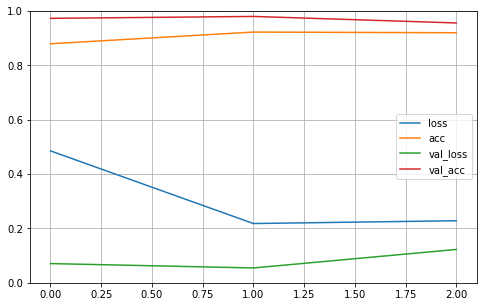

In [34]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [35]:
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [36]:
model.evaluate(test_generator, steps=50) # steps = testset/batch_size

50/50 [==============================] - 61s 1s/step - loss: 0.1526 - acc: 0.9560


[0.15255066752433777, 0.9559999704360962]

 - Pre-trained InceptionResNetV2 Model: acc: 0.9559